In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/Users/gauravtyagi/Downloads/data/LANL-Earthquake-Prediction/train.csv',nrows=50000)


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
data.head(5)

,acoustic_data,time_to_failure
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


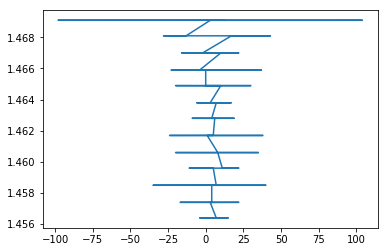

In [6]:
plt.plot(data.acoustic_data,data.time_to_failure)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data['acoustic_data'], data['time_to_failure'],test_size=0.2)

In [6]:
#from sklearn.linear_model import Ridge,Lasso,LinearRegression

In [7]:
#rd=Ridge()
#las=Lasso()
#lr=LinearRegression()

In [8]:
#data['acoustic_data']=data['acoustic_data'].reshape(1,-1)
#X_train=np.array(X_train, dtype=pd.Series)
#y_train=np.array(y_train, dtype=pd.Series)

In [9]:
#X_train=X_train.reshape(-1, 1)
#X_train.shape

In [10]:
#y_train.shape

In [6]:
from statsmodels.genmod.generalized_estimating_equations import GEE
from statsmodels.genmod.cov_struct import (Exchangeable,Independence,Autoregressive)
from statsmodels.genmod.families import Poisson
import statsmodels.api as sm

In [7]:
#fam = Poisson()
#ind = Independence()
X=sm.add_constant(X_train)

/Users/gauravtyagi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [8]:
#model1 = GEE.from_formula(formula='acoustic_data',groups=y_train, data=X_train, cov_struct=ind, family=fam)
model=sm.GLM(y_train,X,family=sm.families.Poisson()).fit()

In [9]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:        time_to_failure   No. Observations:                40000
Model:                            GLM   Df Residuals:                    39998
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46616.
Date:                Thu, 31 Jan 2019   Deviance:                      0.38405
Time:                        18:54:01   Pearson chi2:                    0.384
No. Iterations:                     3   Covariance Type:             nonrobust
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3806      0.005     73.453      0.000       0.370       0.391
acoustic_data  5.315e-06      0.001      0.

In [ ]:
#rd_model=rd.fit(X_train,y_train)

In [12]:
#las_model=las.fit(X_train,y_train)

In [13]:
#lr_model=lr.fit(X_train,y_train)

In [14]:
print('Parameters: ', model.params)
print('T-values: ', model.tvalues)

Parameters:  const            0.380577
acoustic_data    0.000005
dtype: float64
T-values:  const            73.452818
acoustic_data     0.008410
dtype: float64


In [16]:
#test=pd.read_csv('/Users/gauravtyagi/Downloads/data/LANL-Earthquake-Prediction/test/seg_fde86d.csv')


In [24]:

means=X_test.mean(axis=0)
means25 = means.copy()


/Users/gauravtyagi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice.
  


In [25]:
model.predict(means25)

ValueError: shapes (1,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

In [14]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [15]:
#X_test=np.array(X_test, dtype=pd.Series)
#y_test=np.array(y_test, dtype=pd.Series)
#X_test=X_test.reshape(-1,


1)

In [16]:
#rd_out=rd.predict(X_test)

In [17]:
#las_out=rd.predict(X_test)

In [20]:
#lr_out=lr.predict(X_test)

In [21]:
#print('Linear Regression mean square errors =    '+str(mean_squared_error(y_test,lr_out)))
#print('Ridge Regression mean square errors =    '+str(mean_squared_error(y_test,rd_out)))
#print('Lasso Regression mean square errors =    '+str(mean_squared_error(y_test,las_out)))


Linear Regression mean square errors =    13.48684520380459
Ridge Regression mean square errors =    13.48684520380459
Lasso Regression mean square errors =    13.48684520380459
